## Analysing the Unemployment Rate and Participation Rate in the USA

This analysis was done to investigate the relationship between the unemployemnt rate, and the participation rate of the population of different states in the USA. This data was collected from https://fred.stlouisfed.org/ with the use of their 
FRED API. It was found that the unemployment rate is a good indicator of economy and that when the unemployment rate goes up the participation rate goes down, and for most cases when the unployment rate is realtivelow the particiation rate is relatively high.


The packages used in this analys are:

- Pandas
- matplotlib
- plotly
- Numpy

After the data was collected an exploratory data analysis was done to see how varibles change with time along with the unemployment rate.

### Packages

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from fredapi import Fred
import json

In [64]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [7]:
color_pal = plt.rcParams['axes.prop_cycle'].by_key()["color"]
plt.style.use('fivethirtyeight')

Scraping data from https://fred.stlouisfed.org/

In [10]:
with open('APIsecret.json', 'r') as f:
    secrets = json.load(f)

api_key = secrets["api_key"]

In [11]:
# Create the Fred Object
fred = Fred(api_key = api_key)

### Scraping for data and doing Exploratory Data Analysis:

In [15]:
unemp_results = fred.search('unemployment')

In [17]:
unemp_results.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2022-08-10,2022-08-10,Unemployment Rate,1948-01-01,2022-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-08-05 07:44:02-05:00,92,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2022-08-10,2022-08-10,Unemployment Rate,1948-01-01,2022-07-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-08-05 07:43:03-05:00,53,The unemployment rate represents the number of...
NROU,NROU,2022-08-10,2022-08-10,Noncyclical Rate of Unemployment,1949-01-01,2032-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2022-05-26 13:45:04-05:00,66,"Starting with the July, 2021 report: An Update..."
UNEMPLOY,UNEMPLOY,2022-08-10,2022-08-10,Unemployment Level,1948-01-01,2022-07-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2022-08-05 07:44:11-05:00,66,The series comes from the 'Current Population ...
CCSA,CCSA,2022-08-10,2022-08-10,Continued Claims (Insured Unemployment),1967-01-07,2022-07-23,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2022-08-04 07:37:04-05:00,70,"Continued claims, also referred to as insured ..."


In [18]:
unrate = fred.get_series('UNRATE')

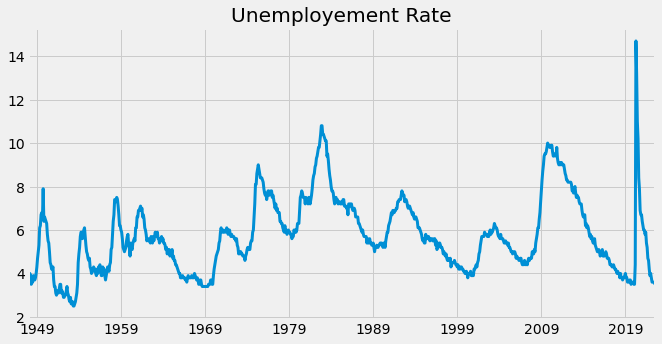

In [21]:
unrate.plot(figsize=(10,5), title='Unemployement Rate', lw=3);

It can be observed that there are particular increases of the unemployment rate in the 1980's, a big increase in 2010 and a very big increase in 2020. This can be linked to the global evnets causing a recession at those times.

#### Now I will find the unemployment rate of each state

In [31]:
unemp_df = fred.search('unemployement rate state', filter = ('frequency','Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units=="Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Census') == False]
unemp_df = unemp_df.drop('USAURAMS')

In [32]:
unemp_df.index

Index(['UNRATE', 'LNS14000006', 'LNS14000031', 'CAUR', 'M0892AUSM156SNBR',
       'M0892BUSM156SNBR', 'LNS14000024', 'FLUR', 'TXUR', 'U2RATE',
       'LNS14000009', 'NYUR', 'LNS14000002', 'OHUR', 'LNS14000003',
       'LNS14027662', 'PAUR', 'MIUR', 'MNUR', 'NJUR', 'TNUR', 'LNS14027660',
       'NCUR', 'MAUR', 'LNS14000001', 'GAUR', 'WIUR', 'COUR', 'ALUR', 'AZUR',
       'WAUR', 'LNS14032183', 'LRUN64TTUSM156S', 'VAUR', 'KYUR', 'LAUR',
       'INUR', 'ILUR', 'ORUR', 'MOUR', 'LNS14000012', 'OKUR', 'SCUR',
       'LNS14000018', 'LNS14024887', 'ARUR', 'NMUR', 'WVUR', 'MDUR', 'MSUR',
       'LNS14000060', 'LNS14027659', 'NVUR', 'IAUR', 'UTUR', 'AKUR', 'DCUR',
       'LASMT261982000000003', 'IDUR', 'NDUR', 'NEUR', 'KSUR', 'HIUR', 'MTUR',
       'CTUR', 'LNS14000032', 'SDUR', 'WYUR', 'LASMT391746000000003',
       'LNS14000036', 'DEUR', 'MEUR', 'NHUR', 'PRUR', 'LRUN24TTUSM156S',
       'LNS14024230', 'LRHUTTTTUSM156S', 'LNS14027689', 'RIUR', 'LNS14000028',
       'VTUR', 'LNS14000089', 'LNS14

In [33]:
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate in')]

In [34]:
unemp_df =unemp_df.drop('LASMT261982000000003')
unemp_df =unemp_df.drop('LASMT391746000000003')

In [76]:
unemp_df.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CAUR,CAUR,2022-08-10,2022-08-10,Unemployment Rate in California,1976-01-01,2022-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-07-25 09:42:01-05:00,54,None
FLUR,FLUR,2022-08-10,2022-08-10,Unemployment Rate in Florida,1976-01-01,2022-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-07-25 09:42:02-05:00,48,None
TXUR,TXUR,2022-08-10,2022-08-10,Unemployment Rate in Texas,1976-01-01,2022-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-07-25 09:42:03-05:00,47,None
NYUR,NYUR,2022-08-10,2022-08-10,Unemployment Rate in New York,1976-01-01,2022-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-07-25 09:42:05-05:00,43,None
OHUR,OHUR,2022-08-10,2022-08-10,Unemployment Rate in Ohio,1976-01-01,2022-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-07-25 09:42:05-05:00,41,None


In [46]:
all_results = []

for myid in unemp_df.index:
    # getting each time series
    results = fred.get_series(myid)
    # turning into a dataframe
    results = results.to_frame(name=myid)
    # adding it to a list
    all_results.append(results)

In [47]:
unemp_results = pd.concat(all_results, axis =1)

Checking for Null values

In [56]:
unemp_results.isna().sum().to_frame(name = 'Null Values').T

,CAUR,FLUR,TXUR,NYUR,OHUR,PAUR,MIUR,MNUR,NJUR,TNUR,...,MTUR,CTUR,SDUR,WYUR,DEUR,MEUR,NHUR,PRUR,RIUR,VTUR
Null Values,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Puerto RIco has 2 null values

In [53]:
unemp_results = unemp_results.dropna()

In [60]:
# mapping the state codes to full state names in a dicitonary
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ', '').to_dict()

In [62]:
#Using list comprehension to replace all the state codes in the table to the full state names
unemp_results.columns = [id_to_state[c] for c in unemp_results.columns]

In [65]:
unemp_results

,California,Florida,Texas,New York,Ohio,Pennsylvania,Michigan,Minnesota,New Jersey,Tennessee,North Carolina,Massachusetts,Georgia,Wisconsin,Colorado,Alabama,Arizona,Washington,Virginia,Kentucky,Louisiana,Indiana,Illinois,Oregon,Missouri,Oklahoma,South Carolina,Arkansas,New Mexico,West Virginia,Maryland,Mississippi,Nevada,Iowa,Utah,Alaska,the District of Columbia,Idaho,North Dakota,Nebraska,Kansas,Hawaii,Montana,Connecticut,South Dakota,Wyoming,Delaware,Maine,New Hampshire,Puerto Rico,Rhode Island,Vermont
1976-01-01,9.2,9.7,5.8,10.3,8.1,8.0,9.9,6.0,10.3,6.0,6.4,10.5,8.4,5.8,5.8,6.6,10.2,8.5,6.1,5.6,6.3,6.6,6.6,9.5,5.9,5.8,7.4,7.3,8.6,7.5,6.4,6.7,9.2,4.3,5.8,7.1,8.7,5.6,3.4,3.3,4.2,9.8,5.8,9.8,3.3,4.1,8.0,8.7,6.5,19.6,7.8,8.6
1976-02-01,9.2,9.7,5.8,10.3,8.1,8.1,9.9,6.0,10.3,6.0,6.4,10.5,8.4,5.8,5.7,6.6,10.2,8.5,6.1,5.6,6.3,6.6,6.6,9.5,5.9,5.8,7.4,7.3,8.7,7.5,6.4,6.7,9.2,4.3,5.9,7.1,8.7,5.6,3.4,3.3,4.2,9.8,5.8,9.8,3.3,4.1,8.0,8.7,6.5,19.5,7.8,8.6
1976-03-01,9.1,9.6,5.9,10.2,8.1,8.1,9.9,5.9,10.3,6.0,6.4,10.5,8.4,5.7,5.7,6.6,10.1,8.4,6.1,5.6,6.3,6.5,6.6,9.4,5.9,5.8,7.3,7.3,8.7,7.5,6.4,6.6,9.2,4.3,5.8,7.0,8.6,5.6,3.4,3.3,4.2,9.8,5.8,9.8,3.2,4.1,8.0,8.6,6.5,19.3,7.7,8.6
1976-04-01,9.1,9.5,5.9,10.2,8.0,8.1,9.8,5.8,10.3,6.0,6.3,10.3,8.3,5.6,5.6,6.5,10.0,8.5,6.0,5.6,6.4,6.3,6.6,9.2,6.0,5.8,7.2,7.2,8.6,7.5,6.4,6.4,9.0,4.2,5.8,6.9,8.5,5.6,3.5,3.2,4.2,9.7,5.8,9.6,3.1,4.0,8.1,8.6,6.5,19.0,7.7,8.6
1976-05-01,9.0,9.3,5.9,10.1,7.8,8.1,9.6,5.7,10.3,5.9,6.1,10.1,8.1,5.5,5.6,6.4,9.8,8.5,5.9,5.5,6.5,6.0,6.6,9.1,6.0,5.7,7.0,7.1,8.6,7.4,6.5,6.3,8.9,4.1,5.7,6.9,8.4,5.6,3.6,3.1,4.2,9.4,5.8,9.4,3.1,3.9,8.3,8.5,6.5,18.9,7.7,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-01,5.3,3.3,4.7,4.9,4.2,5.1,4.7,2.7,4.6,3.4,3.7,4.7,3.2,2.9,4.0,3.0,3.6,4.3,3.2,4.2,4.3,2.3,4.8,4.0,3.7,2.6,3.5,3.1,5.6,3.9,5.0,4.5,5.1,3.5,2.1,5.3,6.1,2.8,2.9,2.1,2.5,4.2,2.6,4.9,2.6,3.6,4.6,4.0,2.7,6.8,3.9,2.9
2022-03-01,4.8,3.2,4.4,4.6,4.1,4.9,4.4,2.5,4.2,3.2,3.5,4.3,3.1,2.8,3.7,2.9,3.3,4.1,3.0,4.0,4.2,2.2,4.7,3.8,3.6,2.7,3.4,3.1,5.3,3.7,4.6,4.2,5.0,3.3,2.0,4.9,6.0,2.7,2.9,2.0,2.4,4.1,2.3,4.6,2.5,3.4,4.5,3.6,2.4,6.5,3.4,2.6
2022-04-01,4.6,3.0,4.3,4.5,4.0,4.8,4.3,2.2,4.1,3.2,3.4,4.1,3.1,2.8,3.6,2.8,3.2,4.1,3.0,3.9,4.1,2.2,4.6,3.7,3.4,2.7,3.3,3.2,5.3,3.6,4.2,4.1,5.0,3.0,1.9,4.8,5.8,2.6,2.8,1.9,2.4,4.1,2.3,4.4,2.3,3.3,4.5,3.3,2.3,6.4,3.2,2.5
2022-05-01,4.3,2.9,4.2,4.4,3.9,4.6,4.3,2.0,3.9,3.3,3.4,3.9,3.0,2.9,3.5,2.7,3.2,3.9,3.0,3.8,4.0,2.2,4.6,3.5,3.1,2.8,3.3,3.2,5.1,3.5,4.0,3.9,4.9,2.7,2.0,4.6,5.7,2.5,2.6,1.9,2.3,4.1,2.4,4.2,2.3,3.2,4.5,3.2,2.1,6.2,2.9,2.3


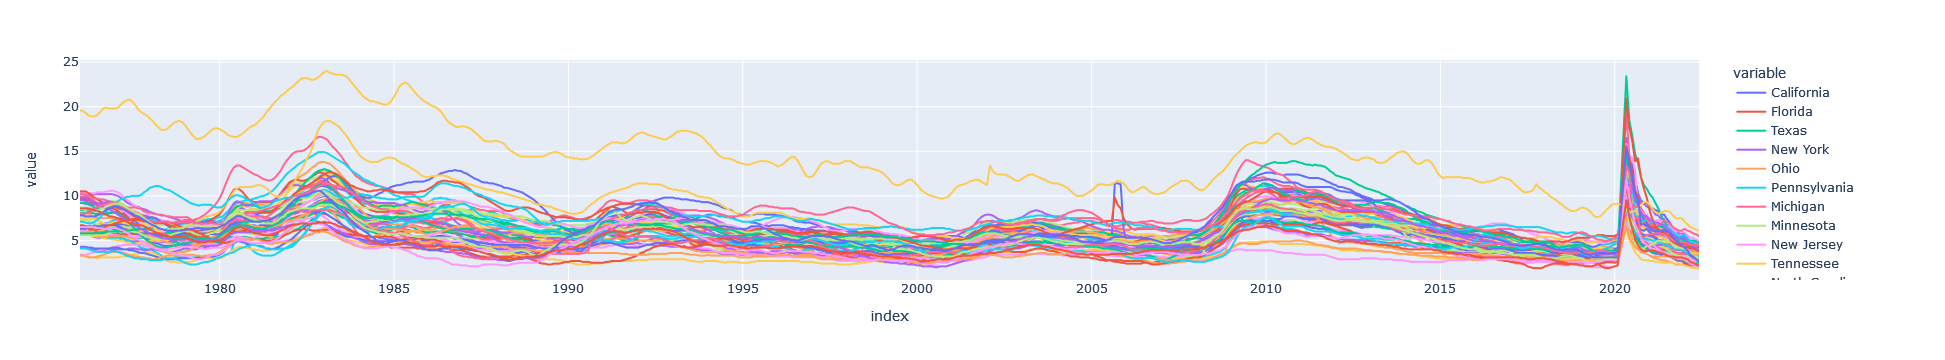

In [69]:
#Using plotly express
px.line(unemp_results)

It appears Puerto Rico has always had a particularly high unemployment rate compared to other states, and that all states expericend a sharp increase od unemployement in
2020 due to the global events.

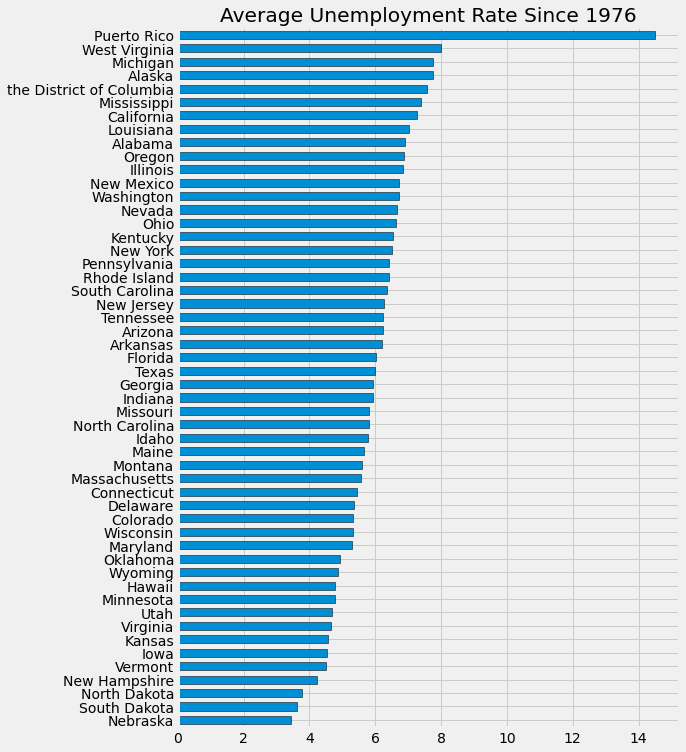

In [71]:
unemp_results.mean(axis=0).sort_values().to_frame(name = 'average unmployment over time of states').plot(kind='barh',width=0.6, edgecolor='black' ,figsize=(8,12), title='Average Unemployment Rate Since 1976').legend().remove()

It appears that Nebraska has always had the lowest average unemployment rate. Maybe it is a good place to live if having a stable career is a priority for a person.

### The labor force participation rate is an estimate of an economy’s active workforce at a given time so there may be so relation between this and the unemployment rate. The formula is the number of people ages 16 and older who are employed or actively seeking employment, divided by the total non-institutionalized, civilian working-age population. They will be compared in the following plots.

Getting participation rate of all the states to see how this changes with the unemployment rate

In [81]:
part_df = fred.search('Labor Force Participation Rate for', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [82]:
 edited_part_df = part_df.loc[part_df['title'].str.contains('Labor Force Participation Rate for')]

In [83]:
edited_part_df.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
LBSSA27,LBSSA27,2022-08-10,2022-08-10,Labor Force Participation Rate for Minnesota,1976-01-01,2022-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-07-22 09:01:02-05:00,35,A state's labor-force participation rate is th...
LBSSA06,LBSSA06,2022-08-10,2022-08-10,Labor Force Participation Rate for California,1976-01-01,2022-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-07-22 09:01:03-05:00,19,A state's labor-force participation rate is th...
LBSSA12,LBSSA12,2022-08-10,2022-08-10,Labor Force Participation Rate for Florida,1976-01-01,2022-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-07-22 09:01:02-05:00,27,A state's labor-force participation rate is th...
LBSSA01,LBSSA01,2022-08-10,2022-08-10,Labor Force Participation Rate for Alabama,1976-01-01,2022-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-07-22 09:01:10-05:00,11,A state's labor-force participation rate is th...
LBSSA48,LBSSA48,2022-08-10,2022-08-10,Labor Force Participation Rate for Texas,1976-01-01,2022-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-07-22 09:01:03-05:00,24,A state's labor-force participation rate is th...


In [85]:
participation_all_results = []

for myid in edited_part_df.index:
    # getting each time series
    results = fred.get_series(myid)
    # turning into a dataframe
    results = results.to_frame(name=myid)
    # adding it to a list
    participation_all_results.append(results)

In [86]:
part_df = pd.concat(participation_all_results, axis =1)

In [88]:
# renaming the codes of the columns to the state names
participationid_to_state = edited_part_df['title'].str.replace('Labor Force Participation Rate for ', '').to_dict()
part_df.columns = [participationid_to_state[x] for x in part_df.columns]

In [89]:
part_df

,Minnesota,California,Florida,Alabama,Texas,Kentucky,Michigan,Wisconsin,Ohio,New York,North Carolina,Pennsylvania,Massachusetts,Colorado,Georgia,Iowa,New Mexico,Virginia,Illinois,West Virginia,Indiana,New Hampshire,Tennessee,Mississippi,Maryland,Oklahoma,Maine,Missouri,Kansas,South Dakota,Utah,Nebraska,Louisiana,South Carolina,Alaska,Washington,Connecticut,Nevada,Oregon,Arizona,Arkansas,Vermont,New Jersey,Idaho,Montana,Wyoming,North Dakota,Rhode Island,District Of Columbia,Hawaii,Delaware
1976-01-01,65.6,62.6,55.8,57.0,63.8,60.5,61.6,65.6,61.7,58.0,66.5,58.4,64.8,67.2,63.7,64.4,60.8,65.9,63.0,52.5,64.0,65.9,59.6,58.8,64.3,59.3,62.1,60.5,65.1,64.6,62.8,64.9,56.8,65.3,69.0,60.9,64.2,71.3,62.9,59.5,57.9,63.6,61.5,63.0,62.7,65.3,62.6,63.8,64.4,69.9,62.7
1976-02-01,65.5,62.4,55.7,56.9,63.5,60.3,61.5,65.5,61.7,58.0,66.3,58.3,64.7,67.0,63.6,64.3,60.5,65.8,63.0,52.4,63.9,65.6,59.4,58.6,64.2,59.2,61.9,60.3,65.0,64.4,62.6,64.9,56.6,65.2,68.4,60.7,64.1,70.8,62.7,59.2,57.8,63.4,61.4,62.8,62.5,64.9,62.4,63.7,64.5,69.6,62.5
1976-03-01,65.4,62.2,55.5,56.8,63.4,60.2,61.5,65.4,61.7,58.0,66.2,58.3,64.6,66.8,63.5,64.2,60.3,65.6,62.9,52.3,63.8,65.6,59.3,58.5,64.1,59.1,61.9,60.3,64.9,64.4,62.5,64.8,56.5,65.0,67.8,60.6,64.0,70.5,62.5,59.1,57.7,63.2,61.4,62.7,62.4,64.7,62.3,63.6,64.5,69.6,62.5
1976-04-01,65.4,62.2,55.5,56.8,63.5,60.1,61.6,65.4,61.6,58.0,66.2,58.3,64.6,66.6,63.5,64.1,60.3,65.5,62.9,52.3,63.8,65.7,59.3,58.5,64.1,59.0,61.8,60.4,65.0,64.3,62.5,64.8,56.4,64.9,67.9,60.6,64.1,70.4,62.4,59.1,57.7,63.5,61.5,62.7,62.3,64.9,62.5,63.7,64.5,69.4,62.4
1976-05-01,65.5,62.3,55.4,56.8,63.6,60.1,61.7,65.5,61.6,58.1,66.3,58.3,64.6,66.5,63.6,64.1,60.3,65.4,63.0,52.2,63.9,66.0,59.4,58.5,64.1,59.0,61.7,60.6,65.1,64.3,62.6,64.8,56.4,64.7,67.9,60.7,64.3,70.5,62.5,59.1,57.7,63.6,61.6,62.8,62.2,65.2,62.6,63.6,64.4,69.3,62.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-01,67.9,61.5,58.6,56.6,63.4,58.0,59.5,66.4,61.6,59.1,59.7,61.0,65.9,68.7,61.9,67.0,56.7,63.0,63.9,55.0,62.1,65.2,60.4,55.0,65.5,60.2,59.3,63.2,66.2,68.4,67.4,69.8,58.2,57.2,66.1,64.5,63.6,59.6,62.8,60.8,56.5,60.9,62.5,61.8,62.2,63.7,69.1,63.2,71.8,60.3,61.2
2022-03-01,68.1,61.7,58.8,56.8,63.4,58.1,59.6,66.5,61.7,59.1,59.8,61.2,66.0,68.9,62.1,67.2,56.7,63.3,64.2,55.0,62.4,65.3,60.6,55.2,65.6,60.4,59.2,63.3,66.2,68.5,67.6,69.8,58.6,57.2,66.0,64.8,64.0,59.7,63.0,60.7,56.6,61.2,62.4,62.0,62.3,63.6,69.2,63.2,72.1,60.3,61.2
2022-04-01,68.3,62.1,58.9,57.0,63.6,58.1,59.8,66.5,61.8,59.4,60.1,61.4,66.0,69.1,62.2,67.4,56.8,63.5,64.5,55.1,62.6,65.3,60.9,55.4,65.5,60.5,59.0,63.4,66.3,68.6,67.8,69.9,58.9,57.3,66.1,65.1,64.2,59.9,63.3,60.8,56.8,61.4,62.6,62.1,62.4,63.7,69.3,63.2,72.4,60.5,61.2
2022-05-01,68.4,62.3,59.1,57.1,63.7,58.2,60.0,66.5,62.0,59.8,60.4,61.7,66.0,69.4,62.3,67.6,56.9,63.8,64.6,55.1,62.9,65.5,61.1,55.5,65.7,60.7,59.0,63.3,66.5,68.8,68.0,70.0,59.0,57.5,66.2,65.2,64.4,60.1,63.5,60.9,56.9,61.5,62.8,62.4,62.5,63.7,69.3,63.3,72.7,60.7,61.2


Participation Rate of All States after 1976

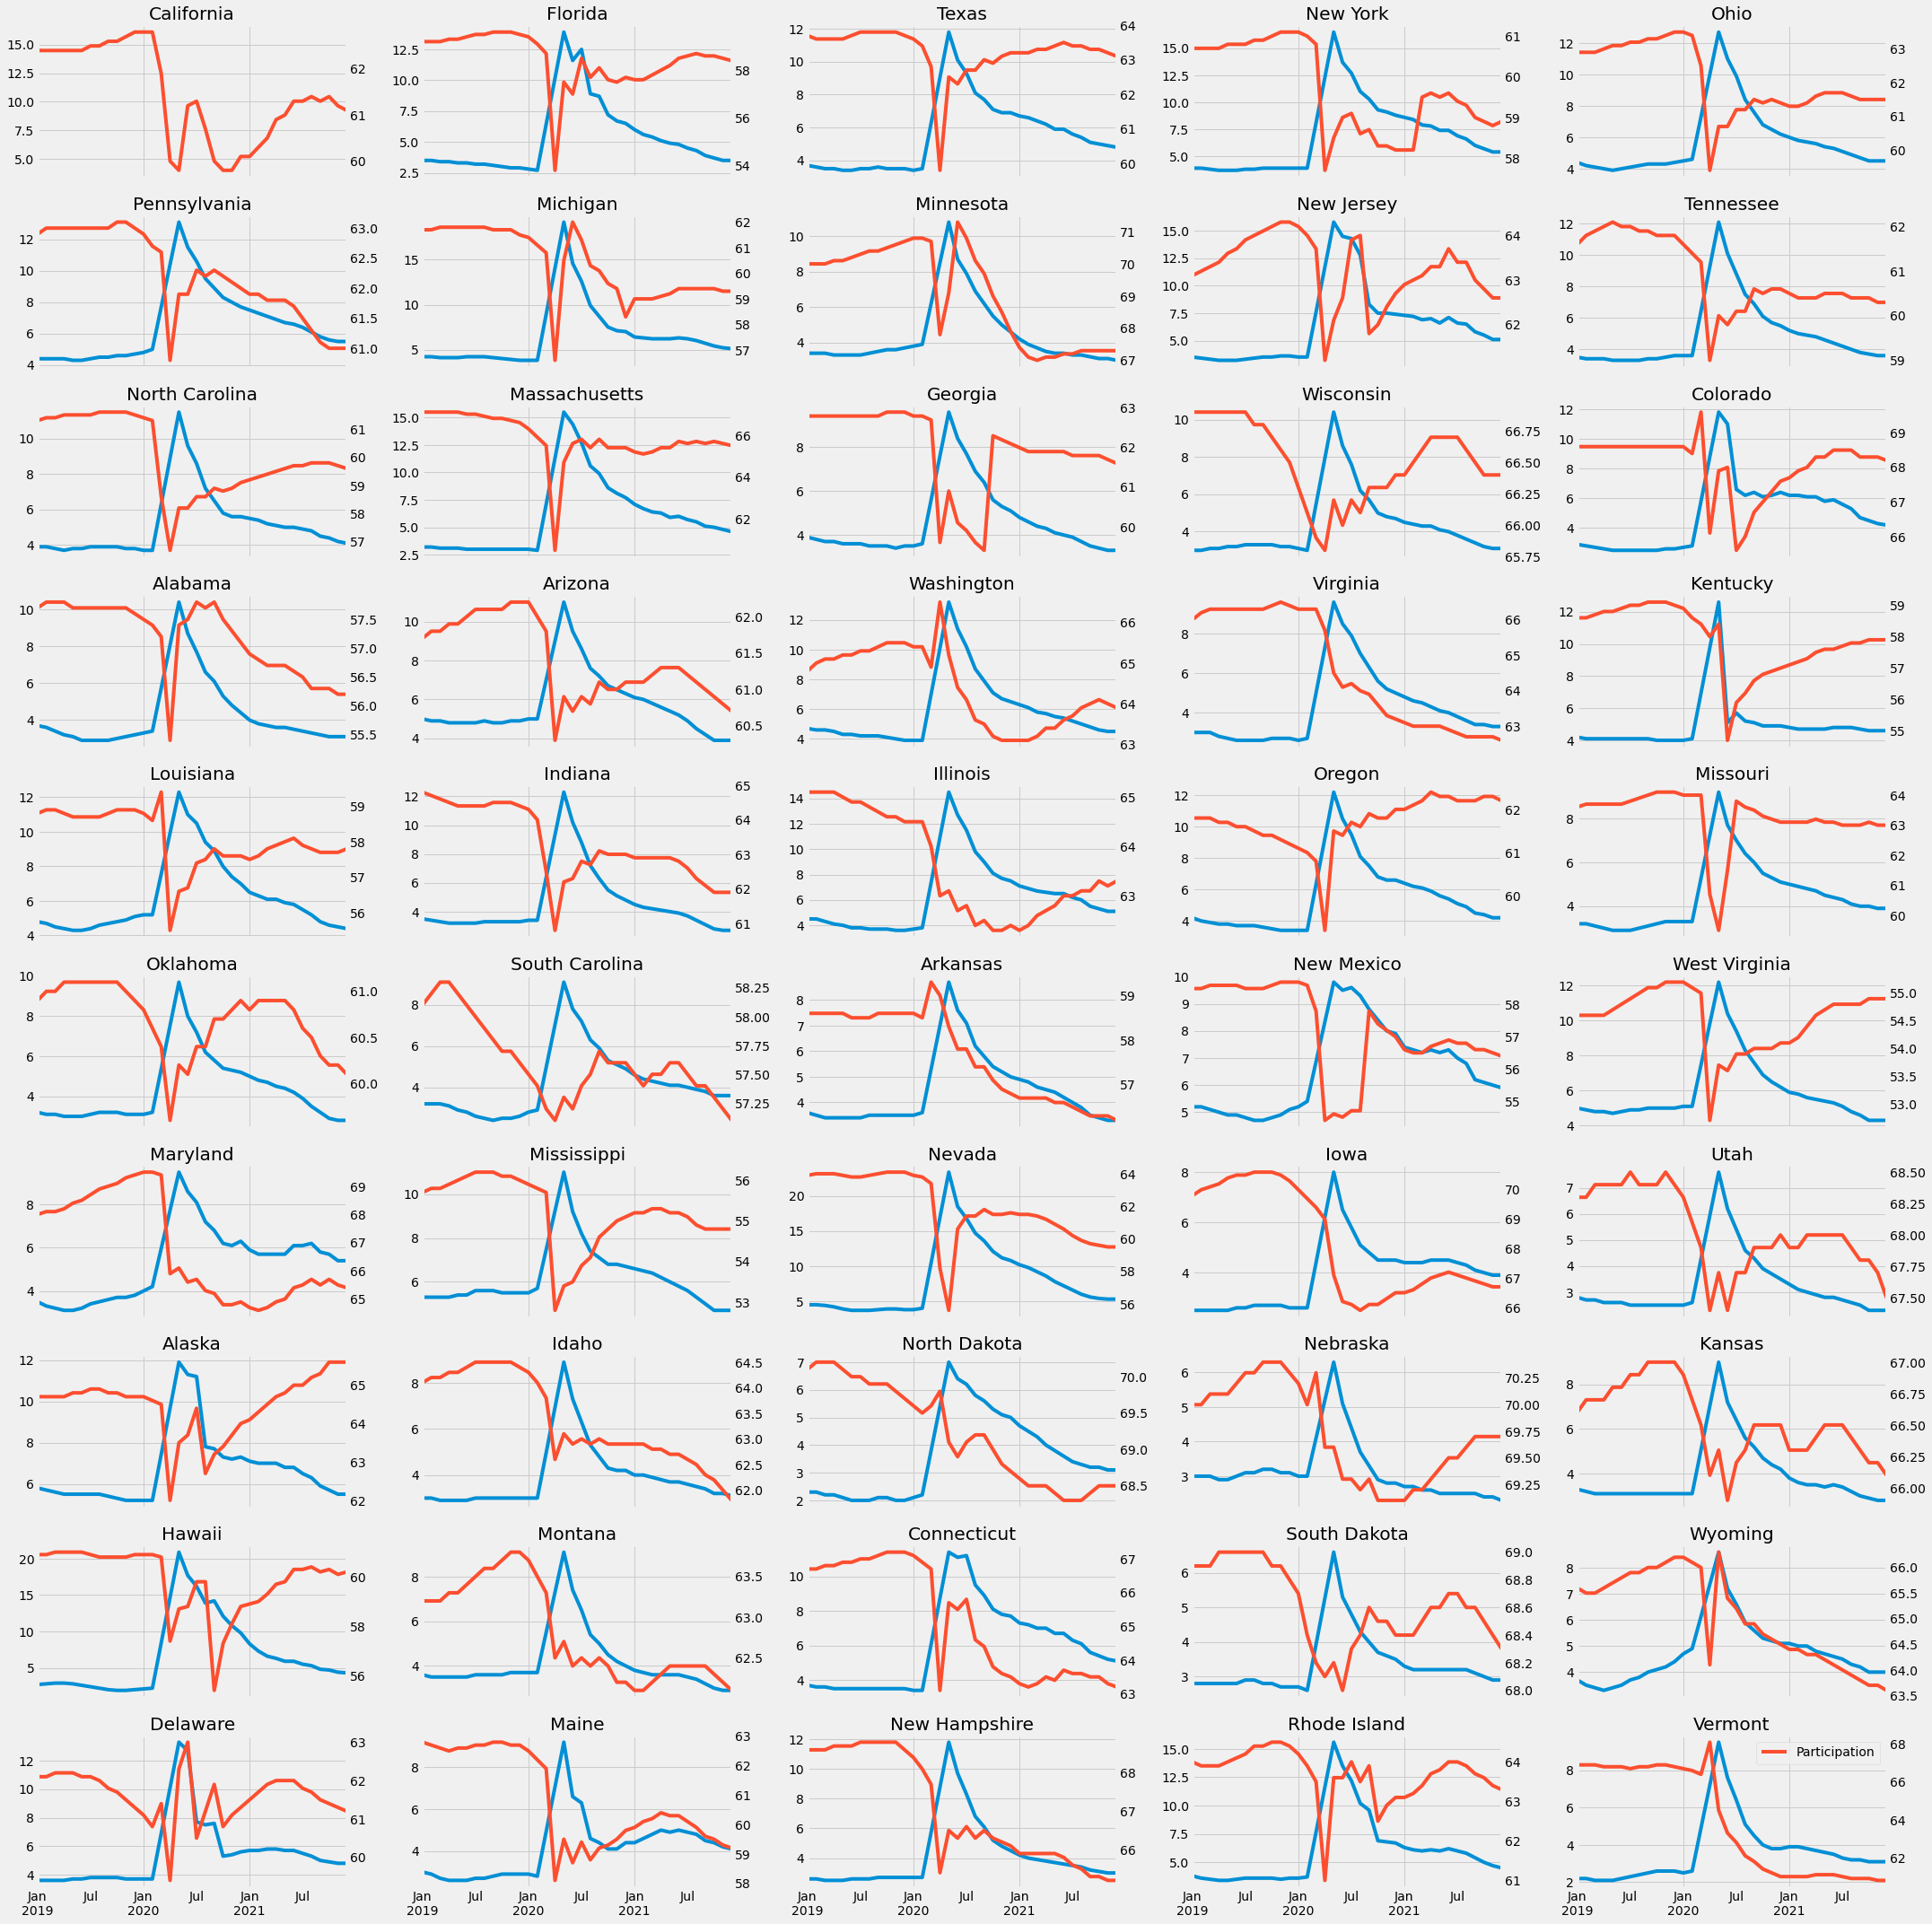

In [92]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
#here I am looping thorugh the dataframes that contain all the unployment rates and particpation rates of each state and plotting them against eachother.

for state in unemp_results.columns:
    
    if (state.strip() in part_df) :  
        ax2 = axs[i].twinx()
        unemp_results.query('index >= 2019 and index < 2022')[state] \
            .plot(ax=axs[i], label='Unemployment')
        part_df.query('index >= 2019 and index < 2022')[state.strip()] \
            .plot(ax=ax2, label='Participation', color=color_pal[1])
        ax2.grid(False)
        axs[i].set_title(state)
        i += 1
    else:
        continue

plt.legend()
plt.tight_layout()
plt.show()


It can be seen that when unemployment rate went up the participation sharply decreased for most states. Then the particpation rate increases the following months. This means that when the suddent increase of unemployment aoccured a lot of people who were part of the work force got removed from it. Then after a lot of these people were able to most likely get a different job and become part of thework force again. But the values of the particopation rate are not as high as they were before the sharp increase of unemployment meaning that some people who lost their jobs were not able to find one after that. A couple plot to observe in particular are states like New Hampshire, Arkansas, and Vermont which had a sharp decrease of the participatin rate and it has stayed that way since. This may mean a lot of people who lost their job in those states may have moved to another state or stil remain jobless. But the unemployment rate is is decreasing over time even though the participation rate has not increased. This could indicate people possibly moving to another state to find jobs in these states. 